<h1 style='color:seagreen' align='center'>Data Science Regression Project: Predicting Home Prices in Banglore</h1>

Dataset source >>> https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

##### Importing Libraries

In [226]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (15,8) # setting figsize

##### Loading Dataset

In [227]:
df = pd.read_csv("blr_house_dataset.csv")
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


##### Checking the count of data and dtypes of features

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


##### Statistical Description of Data

In [229]:
df['price'].describe()

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

##### Dimensions of Original Dataset

In [230]:
df.shape

(13320, 9)

##### Columns of the datasets

In [231]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

##### Checking unique types of area 

In [232]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

##### Count of each type of area of house

In [233]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

##### Drop features that are not required or not useful to build our model

In [234]:
df_drop_useless = df.drop(['area_type','society','balcony','availability'],axis='columns')
df_drop_useless.shape

(13320, 5)

##### Handling Null Values

In [235]:
df_drop_useless.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

##### Dimensions of Dataset after dropping some features

In [236]:
df_drop_useless.shape

(13320, 5)

##### Dropping Null Values

In [237]:
df_drop_nan = df_drop_useless.dropna()
df_drop_nan.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

##### Dimensions of Dataset after dropping some features and dropping null values

In [238]:
df_drop_nan.shape

(13246, 5)

##### Knowing the no. of records in each feature and dtypes of features

In [239]:
df_drop_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(2), object(3)
memory usage: 620.9+ KB


#### Feature Engineering

##### Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [240]:
df_drop_nan['bhk'] = df_drop_nan['size'].apply(lambda x: int(x.split(' ')[0])) # accessing first digit 
df_drop_nan['bhk'].unique()

<ipython-input-240-51d5d32febc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_nan['bhk'] = df_drop_nan['size'].apply(lambda x: int(x.split(' ')[0])) # accessing first digit


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

##### Converting and exploring total_sqft feature

In [241]:
def is_float(n):
    '''to check that the total_sqft is float'''
    try:
        float(n)
    except:
        return False
    return True

In [242]:
df_drop_nan[~df_drop_nan['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


##### The total_sqft  is a object and not numbers; actually it is the range of total_sqft within those two values as min and max value. Taking average of both the values will give approximately equivalent value. 

##### As simple interpretation, we will treat this feature first and will try to get the float values at the place of that object values of current feature.

In [243]:
def sqft_to_float(n):
    area = n.split('-')
    if len(area) == 2:
        return (float(area[0])+float(area[1]))/2
    try:
        return float(n)
    except:
        return None   

In [244]:
df_clean_copy = df_drop_nan.copy()
df_clean_copy['total_sqft'] = df_clean_copy['total_sqft'].apply(sqft_to_float)
df_clean_copy = df_clean_copy[df_clean_copy['total_sqft'].notnull()]
df_clean_copy.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


## Feature Engineering

##### Add new feature called price per square feet

In [245]:
df_clean = df_clean_copy.copy()
df_clean['price_per_sqft'] = df_clean['price']*100000/df_clean['total_sqft']
df_clean.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [246]:
df_clean_describe = df_clean['price_per_sqft'].describe()
df_clean_describe

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [247]:
df_clean.to_csv("fea_eng_blr_data.csv",index=False)

#### Dimentionality Reduction

##### Getting count of number of houses at each location and using dimensionality reduction technique to minimise number of locations

In [248]:
df_clean['location'] = df_clean['location'].apply(lambda x: x.strip())
location_count = df_clean['location'].value_counts(ascending=False)
location_count

Whitefield                         533
Sarjapur  Road                     392
Electronic City                    304
Kanakpura Road                     264
Thanisandra                        235
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Prasanna layout Herohalli            1
Mango Garden Layout                  1
Old Mangammanapalya Road             1
manyata tech park                    1
Name: location, Length: 1287, dtype: int64

##### Count less than 10 for any location will be labeled as "discard" location. The toal number of categories can be reduced at greater extent. 

In [249]:
location_less_10 = location_count[location_count<=10]
location_less_10

Nagappa Reddy Layout               10
Sadashiva Nagar                    10
Sector 1 HSR Layout                10
Naganathapura                      10
Thyagaraja Nagar                   10
                                   ..
3rd Stage Raja Rajeshwari Nagar     1
Prasanna layout Herohalli           1
Mango Garden Layout                 1
Old Mangammanapalya Road            1
manyata tech park                   1
Name: location, Length: 1047, dtype: int64

In [250]:
df_clean['location'] = df_clean['location'].apply(lambda x: 'discard' if x in location_less_10 else x)
len(df_clean.location.unique())

241

In [251]:
df_clean.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,discard,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


#### Outlier Removal Using Business Logic

##### business manager or domain expert, will explain that generally square ft per bedroom is 300. We will remove outliers by keeping our minimum thresold per bhk to be 300 sqft

In [252]:
df_clean[df_clean['total_sqft']/df_clean['bhk']<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,discard,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,discard,3 Bedroom,500.0,3.0,100.0,3,20000.000000


##### The above metrics tell us that, some of the total_sqft and size is not practically matching. We will clearly maintain the data will remove the errors in it.

In [253]:
df_clean.shape

(13200, 7)

##### Let's the dimension of data after setting threshold per bhk to be 300 sqft

In [255]:
df_min_thresh = df_clean[~(df_clean['total_sqft']/df_clean['bhk']<300)]
df_min_thresh

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,discard,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


##### Outlier Removal Using Standard Deviation and Mean

In [256]:
df_min_thresh['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

##### As our data is widely spread, we can take look on minimum price per sqft is 267 rs/sqft and comparing to that maximum is 12000000 rs/sqft. Using mean and one standard deviation we will remove ouliers per location.

In [257]:
def treat_outliers(df):
    df_new = pd.DataFrame()
    for key, df_group in df.groupby('location'):
        std = np.std(df_group['price_per_sqft'])
        mu = np.mean(df_group['price_per_sqft'])
        df_optimized = df_group[(df_group['price_per_sqft'] > (mu-std)) & (df_group['price_per_sqft'] <= (mu+std))]
        df_new = pd.concat([df_new,df_optimized], ignore_index=True)
    return df_new
df_plot_bhk = treat_outliers(df_min_thresh)
df_plot_bhk.shape

(10242, 7)

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

In [258]:
def plot_scatter_chart(df,location):
    df_2_bhk = df[(df['location']==location) & (df['bhk']==2)]
    df_3_bhk = df[(df['location']==location) & (df['bhk']==3)]
    matplotlib.rcParams['figure.figsize'] = (20,10)
    plt.scatter(df_2_bhk['total_sqft'],df_2_bhk['price'],color='magenta',label='2 BHK', s=50)
    plt.scatter(df_3_bhk['total_sqft'],df_3_bhk['price'], color='seagreen',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

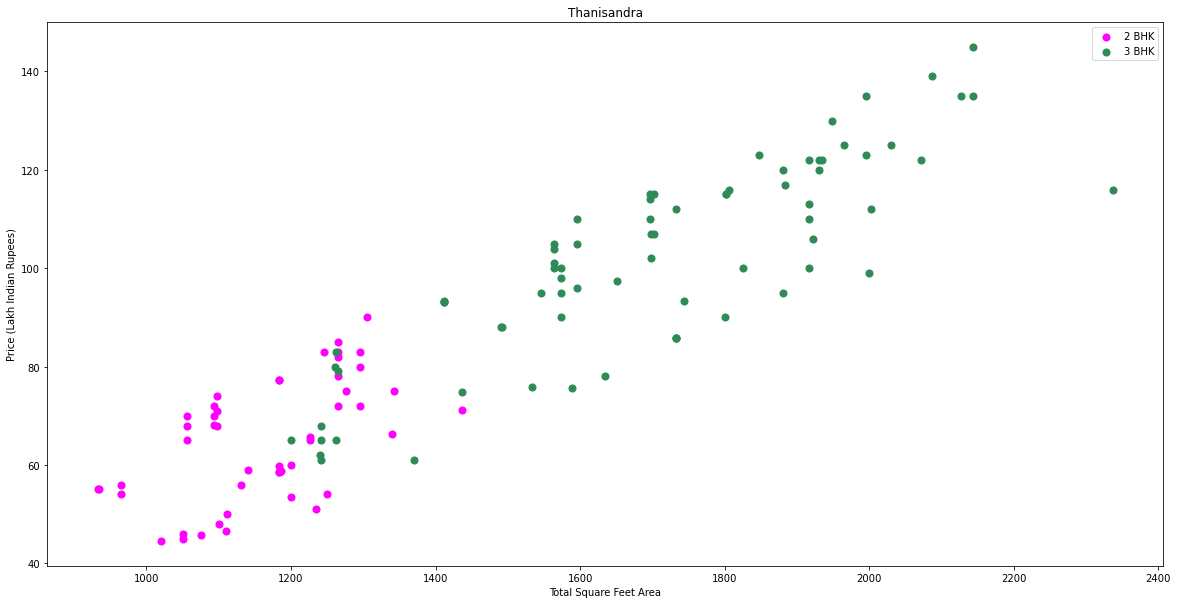

In [259]:
plot_scatter_chart(df_plot_bhk,"Thanisandra")

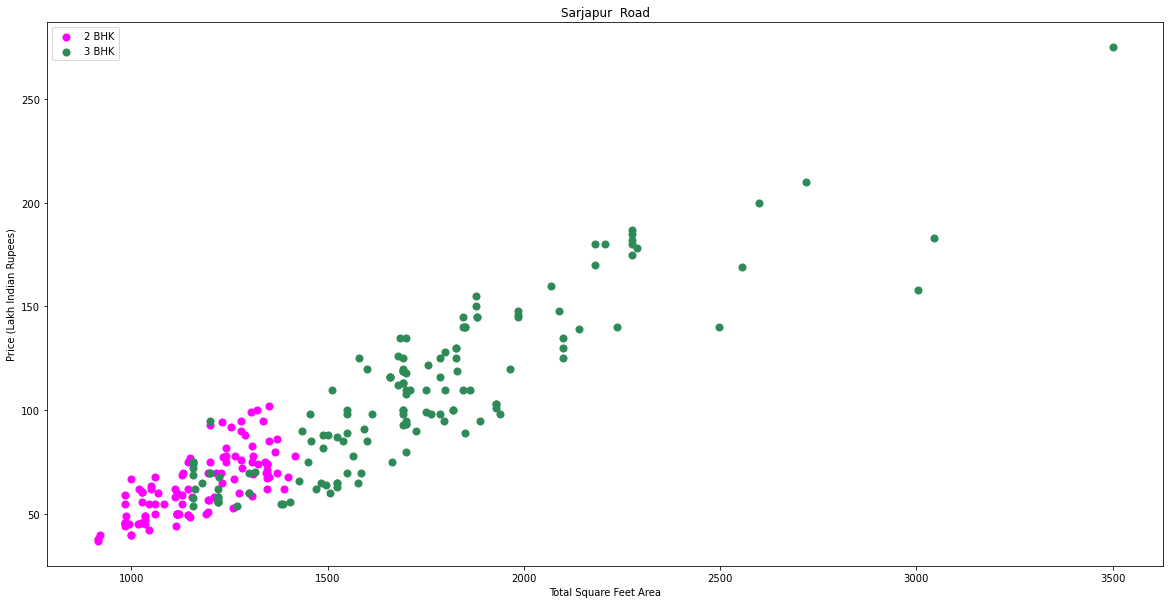

In [260]:
plot_scatter_chart(df_plot_bhk,"Sarjapur  Road")

##### Some data points in above visualizations says that, the price of 3 BHK is less than 2 BHK with around equivalent sqft area. We should remove such data points as for location.nWhat we will do is for a given location, we will build a dictionary of stats per bhk, i.e. Also, Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**
```
{
'1' : {'mean': 4000,'std: 2000,'count': 34},
'2' : {'mean': 4300,'std: 2300,'count': 22},    
}```

In [261]:
def treat_bhk_error(df):
    index_to_ignore = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_collection = {}
        for bhk, df_bhk in location_df.groupby('bhk'):
            bhk_collection[bhk] = {
                'mean': np.mean(df_bhk['price_per_sqft']),
                'std': np.std(df_bhk['price_per_sqft']),
                'count': df_bhk.shape[0]
            }
        for bhk, df_bhk in location_df.groupby('bhk'):
            collection = bhk_collection.get(bhk-1)
            if collection and collection['count']>5:
                index_to_ignore = np.append(index_to_ignore, df_bhk[df_bhk['price_per_sqft']<(collection['mean'])].index.values)
    return df.drop(index_to_ignore,axis='index')

In [262]:
df_bhk_error_removed = treat_bhk_error(df_plot_bhk)
df8 = df_bhk_error_removed.copy()
df8.shape

(7317, 7)

**Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties**

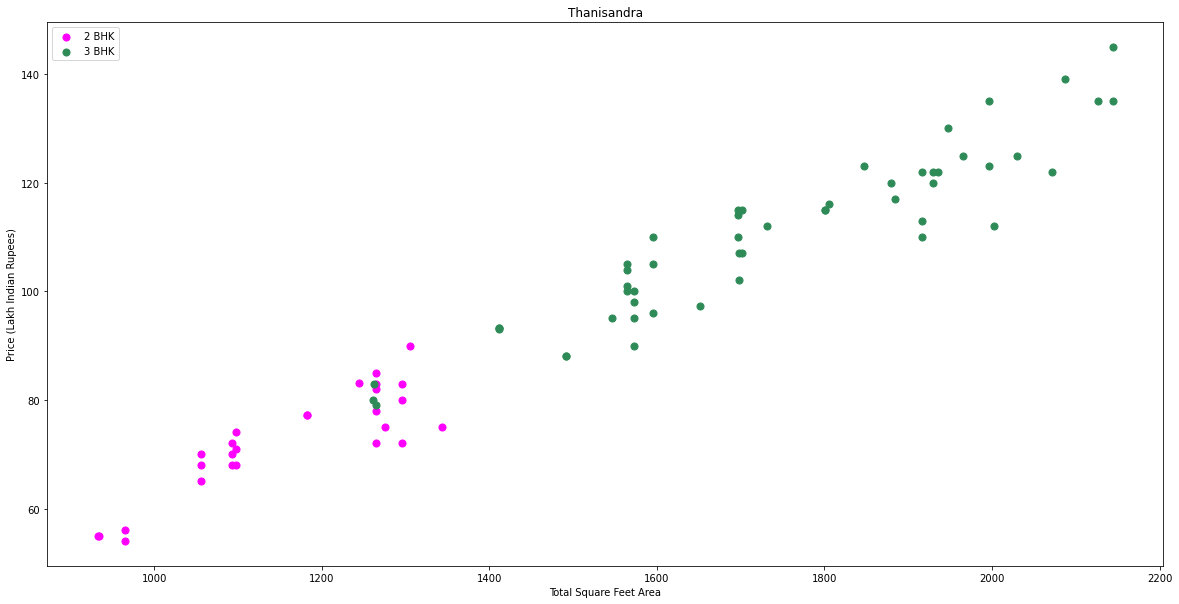

In [263]:
plot_scatter_chart(df_bhk_error_removed,"Thanisandra")
plt.show()

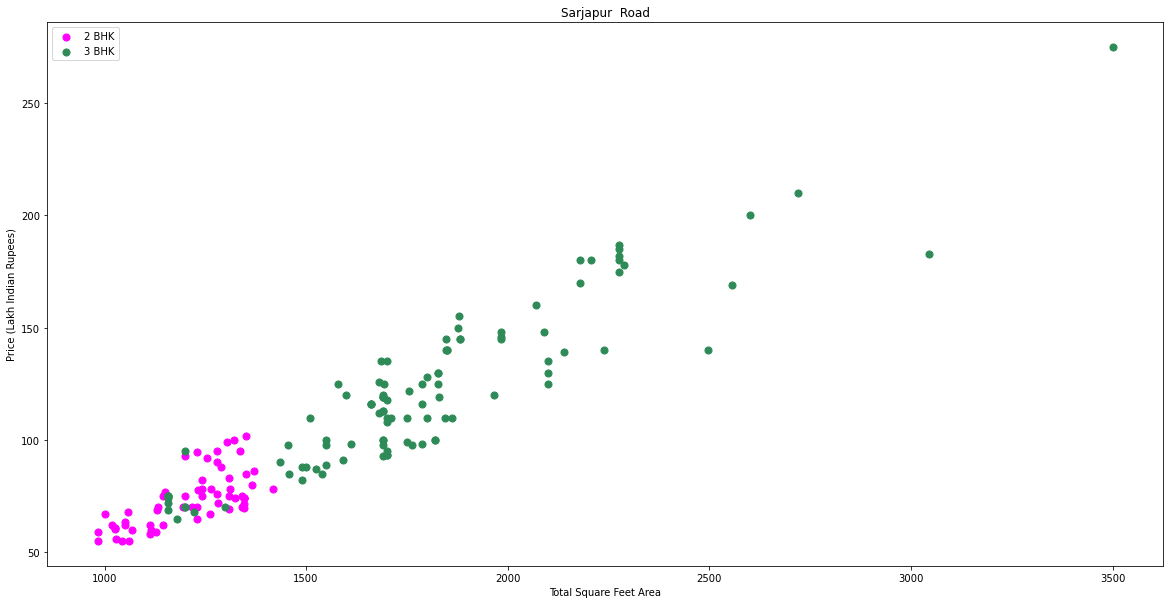

In [264]:
plot_scatter_chart(df_bhk_error_removed,"Sarjapur  Road")
plt.show()

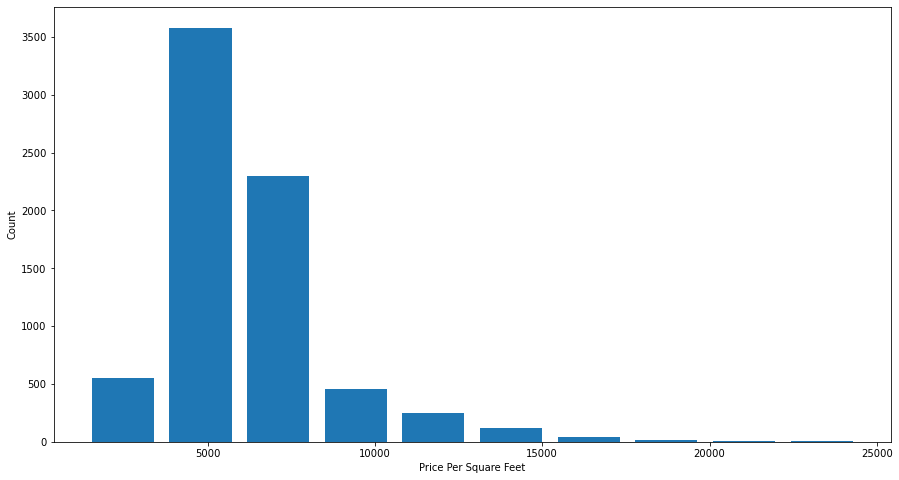

In [265]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (15,8)
plt.hist(df_bhk_error_removed['price_per_sqft'],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()

##### Outlier Removal Using Bathrooms Feature

In [266]:
df_bhk_error_removed['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

##### the above array has wide spread of values of bathroom feature. We will first look at the spread of values and existence of them in the dataset and then we will decide that which values to be skipped to get the optimised dataset.

Text(0, 0.5, 'Count')

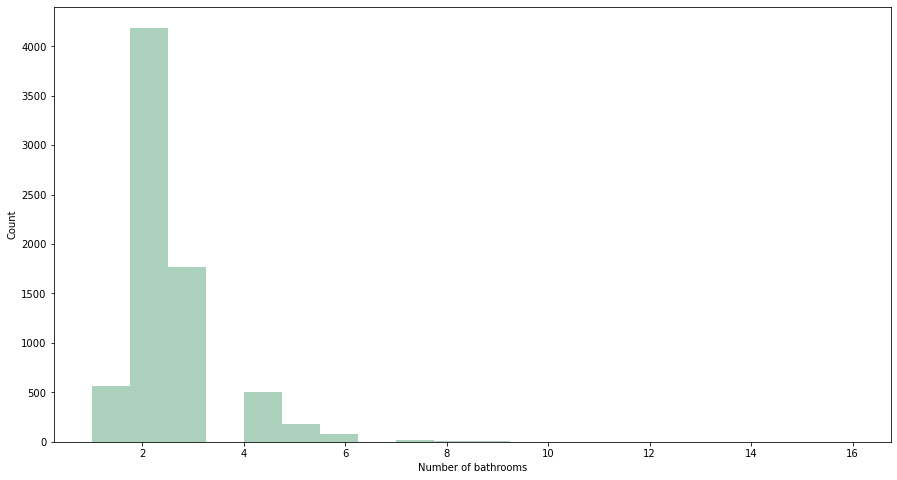

In [267]:
sns.distplot(df_bhk_error_removed['bath'],kde=False,color='seagreen', bins=20)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

##### After observing the histogram, we can remove the records having bathroom feature more than 10. 

In [268]:
df_bhk_error_removed[df_bhk_error_removed['bath']>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,discard,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,discard,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,discard,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,discard,13 BHK,5425.0,13.0,275.0,13,5069.124424


##### It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [269]:
df_bhk_error_removed[df_bhk_error_removed['bath']>df_bhk_error_removed['bhk']+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,discard,6 BHK,11338.0,9.0,1000.0,6,8819.897689


##### Again the business manager told that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [270]:
df_optimised_data = df_bhk_error_removed[df_bhk_error_removed['bath']<df_bhk_error_removed['bhk']+2]
df_optimised_data.shape

(7239, 7)

In [271]:
df_optimised_data.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [273]:
df_useful_features = df_optimised_data.drop(['size','price_per_sqft'], axis='columns')
df_useful_features.head(5)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


##### One Hot Encoding For Location

##### It will help us with having fewer dummy columns

In [274]:
dummies = pd.get_dummies(df_useful_features.location)
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,discard
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [275]:
df_integrated_with_location = pd.concat([df_useful_features,dummies.drop('discard',axis='columns')],axis='columns')
df_integrated_with_location.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [276]:
df_integrated = df_integrated_with_location.drop('location',axis='columns')
df_integrated.head(15)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,413.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,368.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1875.0,3.0,167.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1500.0,5.0,85.0,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2065.0,4.0,210.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Model Building

In [277]:
df_integrated.shape

(7239, 244)

In [278]:
X = df_integrated.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [279]:
X.shape

(7239, 243)

In [280]:
y = df_integrated.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [281]:
len(y)

7239

In [282]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [283]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8629132245229443

##### Cross Validating (K Fold) to check the accuracy of Linear Regression Model  

In [284]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

##### We got a score above 80% in all the iterations. This result is good and even some regression models get more accuracy than this.

##### Quantify which model is best using GridSearchCV

In [285]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def best_gridsearchcv(X,y):
    '''The function for finding which model is best using GridSearchCV'''
    models = {'linear_regression' : {'model': LinearRegression(),'params': {'normalize': [True, False]}},
        'decision_tree': {'model': DecisionTreeRegressor(),'params': {'criterion' : ['mse','friedman_mse'],
                                                                      'splitter': ['best','random']}}
             }
    
    result = []
    
    coeff = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for model_name, config in models.items():
        GridSea =GridSearchCV(config['model'],  config['params'],cv=coeff, return_train_score=False)
        GridSea.fit(X,y)
        result.append({'model_used': model_name,'result_score': GridSea.best_score_,'final_best_params': GridSea.best_params_})

    return pd.DataFrame(result,columns=['model_used','result_score','final_best_params'])

best_gridsearchcv(X,y)

,model_used,result_score,final_best_params
0,linear_regression,0.847796,{'normalize': False}
1,decision_tree,0.720619,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


##### The above metrics tells us that the LinearRegression ahs the best score amongst two, with compared with DecisionTree. Hence, We will use LinearRegression 

##### Testing the model

In [286]:
def prediction(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [287]:
prediction('Vittasandra',1000, 2, 2)

44.60099392270456

In [288]:
prediction("Sarjapur  Road",1000, 3, 3)

58.025147926611574

In [289]:
prediction('2nd Stage Nagarbhavi',1000, 2, 3)

182.7016822119588

In [290]:
prediction("Vijayanagar",1000, 2, 3)

60.20714523969721